In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install ucimlrepo

In [4]:
from ucimlrepo import fetch_ucirepo 
  
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544) 

X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features 

# Since Height and Weight directly define the Mass Body Index -> Obesity Classification, we remove Height.
X = X[[col for col in X.columns if col not in ["Height"]]]

y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets

In [5]:
numerical_cols = ["Age", "FCVC", "NCP", "CH2O", "FAF", "TUE", "Weight"]
categorical_cols = [col for col in X.columns if col not in numerical_cols]

In [6]:
from sklearn.model_selection import train_test_split
# Train-test split - note: conduct this first before all pre-processing because all pre processing should be based on the train set ONLY (avoid data leakage)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Binary classification

y_train_bin = y_train.isin(["Obesity_Type_I", "Obesity_Type_III", "Obesity_Type_II"]).rename(columns={"NObeyesdad": "is_obese"})["is_obese"]
y_test_bin = y_test.isin(["Obesity_Type_I", "Obesity_Type_III", "Obesity_Type_II"]).rename(columns={"NObeyesdad": "is_obese"})["is_obese"]

# Multiclass classification

y_train_multi = y_train["NObeyesdad"].rename("obesity_category")
y_test_multi = y_test["NObeyesdad"].rename("obesity_category")

# EDA

In [8]:
X_train.describe()

,Age,Weight,FCVC,NCP,CH2O,FAF,TUE
count,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000
mean,24.448979,86.598197,2.421880,2.685886,2.006181,1.004208,0.644357
std,6.477100,26.099410,0.537088,0.782557,0.609598,0.839721,0.602679
min,14.000000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.998636,66.000000,2.000000,2.658599,1.591831,0.132315,0.000000
50%,22.851747,82.977398,2.392422,3.000000,2.000000,1.000000,0.609316
75%,26.000000,106.736879,3.000000,3.000000,2.458165,1.646370,1.000000
max,61.000000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


<Axes: >

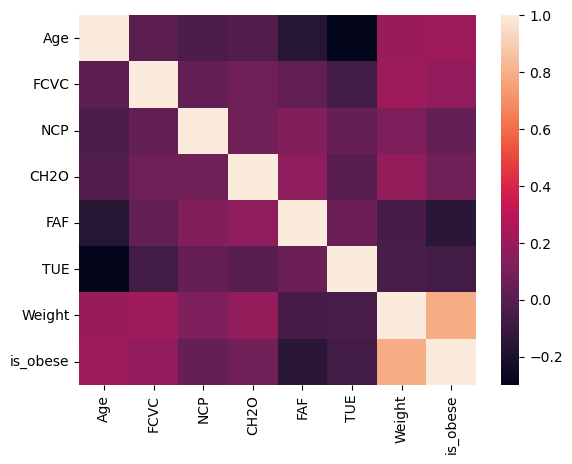

In [9]:
features = ["Age", "FCVC", "NCP", "CH2O", "FAF", "TUE", "Weight"]
outcomes = ["is_obese"]

sns.heatmap(pd.concat([X_train, y_train_bin], axis=1)[features + outcomes].corr())

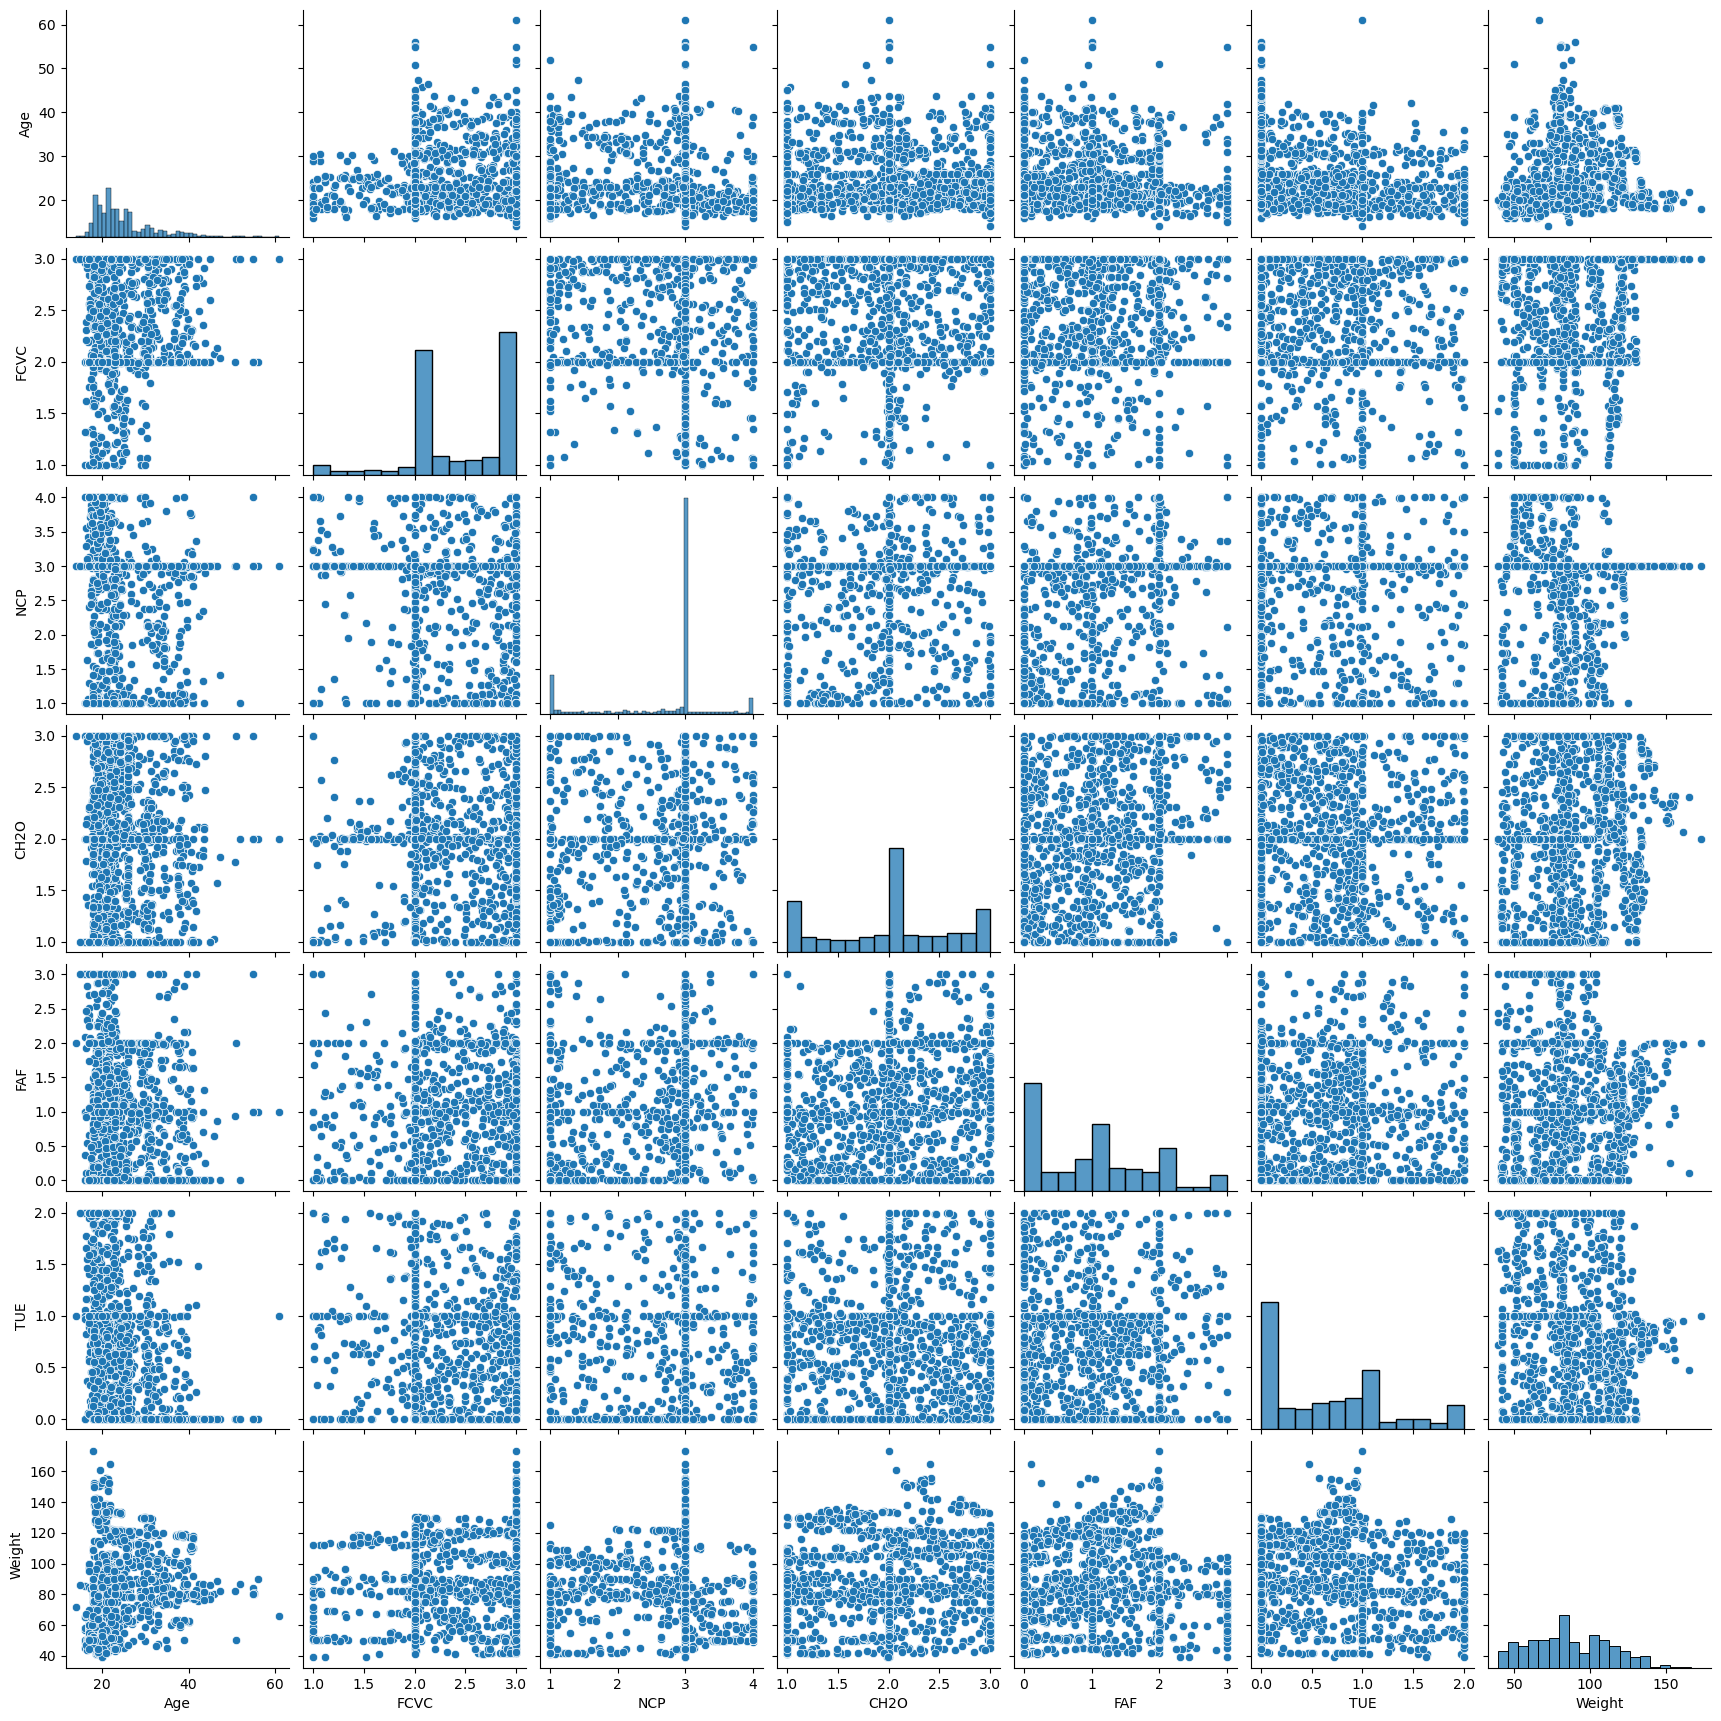

In [10]:
sns.pairplot(X_train[features])

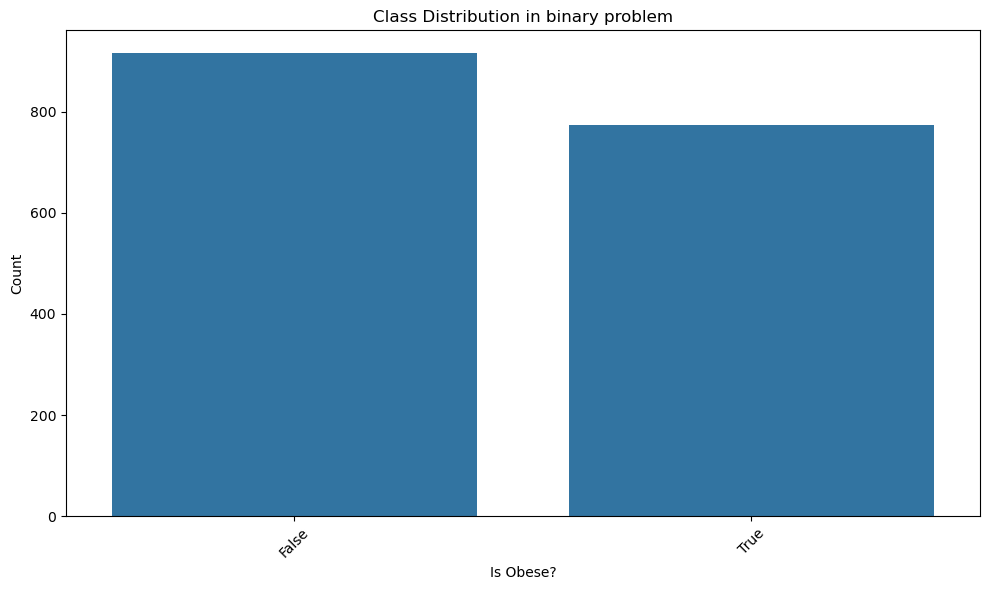

In [11]:
class_counts = y_train_bin.value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel("Is Obese?")
plt.ylabel("Count")
plt.title("Class Distribution in binary problem")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

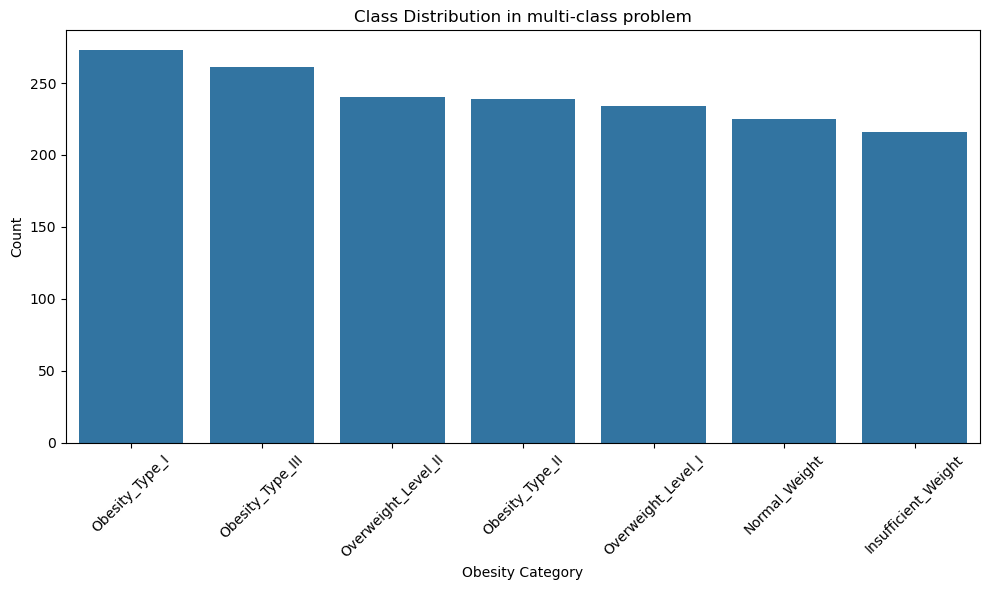

In [12]:
class_counts = y_train_multi.value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel("Obesity Category")
plt.ylabel("Count")
plt.title("Class Distribution in multi-class problem")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()